# California House Price Prediction

## Imports

In [46]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Load the dataset

In [27]:
df = pd.read_csv('housing.csv')

## Display dataset info and first few rows

In [28]:
print("Dataset Overview:")
print(df.info())
print(df.head())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2  

## Check for missing values

In [29]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


## Handling the missing values

In [30]:
df['total_bedrooms'].fillna(df['total_bedrooms'].mean(),inplace=True)

## View values to map

In [21]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

## Mapping this values

In [31]:
mapping={'<1H OCEAN':1,'INLAND':2,'NEAR OCEAN':3,'NEAR BAY':4,'ISLAND':5}
df['ocean_proximity']=df['ocean_proximity'].map(mapping)

## One-hot encoding step

In [32]:
dummy_data=pd.get_dummies(df['ocean_proximity']).astype('int')
print(dummy_data)

       1  2  3  4  5
0      0  0  0  1  0
1      0  0  0  1  0
2      0  0  0  1  0
3      0  0  0  1  0
4      0  0  0  1  0
...   .. .. .. .. ..
20635  0  1  0  0  0
20636  0  1  0  0  0
20637  0  1  0  0  0
20638  0  1  0  0  0
20639  0  1  0  0  0

[20640 rows x 5 columns]


## Concatenate the new data

In [33]:
df = pd.concat([df,dummy_data],axis=1)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,1,2,3,4,5
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,4,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,4,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,4,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,4,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,4,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,2,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,2,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,2,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,2,0,1,0,0,0


In [34]:
df.drop('ocean_proximity',axis=1,inplace=True)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,1,2,3,4,5
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0


## Define features (X) and target (y)

In [40]:
x = df.drop(columns=['median_house_value']).values
y = df["median_house_value"].values

## Split data into training and test sets

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Normalizing the data

In [42]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## Train Linear Regression

In [47]:
LR = LinearRegression()
LR.fit(x_train, y_train)

y_pred = LR.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mean_abs_error = mean_absolute_error(y_test, y_pred)

print("\nLinear Regression Model:")
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R2 Score:", r2)
print("Mean Absolute Error:", mean_abs_error)


Linear Regression Model:
Mean Squared Error: 4904399775.949277
Root Mean Squared Error: 70031.41991955666
R2 Score: 0.6257351821159705
Mean Absolute Error: 50701.77903132993


## Train KNN Regressor

In [48]:
KNN = KNeighborsRegressor()
KNN.fit(x_train, y_train)

y_pred_knn = KNN.predict(x_test)

mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test, y_pred_knn)
mean_absolute_error_knn = mean_absolute_error(y_test, y_pred_knn)

print("\nK-Nearest Neighbors Model:")
print("Mean Squared Error:", mse_knn)
print("Root Mean Squared Error:", rmse_knn)
print("R2 Score:", r2_knn)
print("Mean Absolute Error:", mean_absolute_error_knn)


K-Nearest Neighbors Model:
Mean Squared Error: 3785007031.983973
Root Mean Squared Error: 61522.41081089048
R2 Score: 0.7111583410344924
Mean Absolute Error: 40966.08410852713


## Visualization

In [49]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

### Linear Regression predictions

Text(0, 0.5, 'Predicted Prices')

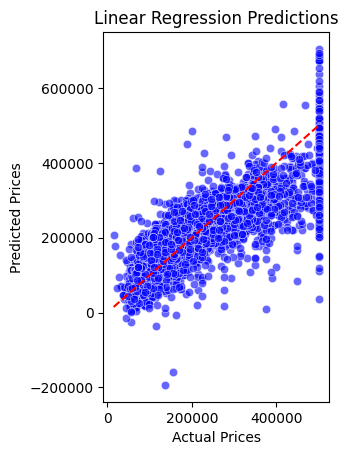

In [51]:
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred, color="blue", alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title("Linear Regression Predictions")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")

### KNN Regression predictions

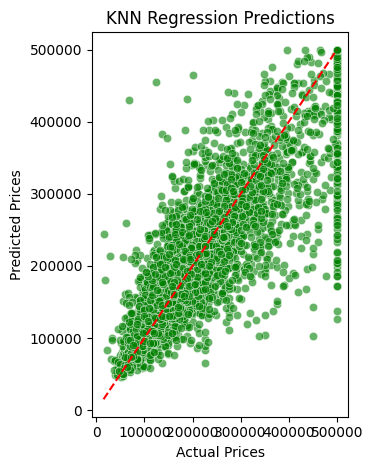

In [52]:
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_pred_knn, color="green", alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title("KNN Regression Predictions")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")

plt.tight_layout()
plt.show()